Connect Google Colab

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import os
#os.chdir('/content/drive/MyDrive/...')

Adding incase colab using cuda(Pytorch)

In [ ]:
#import torch

d#evice = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)

Install and Import package

In [ ]:
%pip install ktrain

In [ ]:
%pip install tensorflow numpy seaborn

In [30]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import re

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Read Data

In [6]:
# read data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [7]:
print(data_train['article'][0])
print()
print(data_test['article'][0])

 當日符合條件股東數約$0$多位 , 單機市價約$1$萬元 , 依單機$1$萬元計算 , 宏達電（2498）昨 $2$ 日股東會上 , 每人一台宏達電旗艦手機新HTC One $3$G手機 , 王雪紅贈股東___G新One，創台股東會單價最高贈品 , $0$ , $1$ , $2$ , $3$ 

 前一世代的iPhone $0$s , 除iPhone $0$s , iPhone $0$s Plus分居第3 , Galaxy S$2$/S$2$ Edge去年全球出貨量較前一代機種 Galaxy S$0$/S$0$ Edge 多出1000萬支 , BBK/VIVO的$1$% , 2016年全球最暢銷 出貨量最多 的智慧手機產品蘋果 Apple 去年9月推出的iPhone $2$ , iPhone $2$排第2 , iPhone $2$之外 , iPhone $2$ Plus , 全球最暢銷機種為iPhone $2$ , iPhone $2$ Plus排第2 , 旗艦機種Galaxy Note $2$雖因連環爆而召回停售 , Galaxy S$2$ Edge , Galaxy S$2$分居第5 , Galaxy S$2$/S$2$ Edge去年全球出貨量較前一代機種 Galaxy S$0$/S$0$ Edge 多出1000萬支 , OPPO推出的OPPO A53位居第$2$位 , 且表現優於三星S$2$ , 市佔排名從2015年的第$2$位躍升至第4位 , OPPO的$3$% , iPhone $0$s為全球最暢銷智慧機；OPPO A53勝過三星S___ , $0$ , $1$ , $2$ , $3$ 


Check Bad Samples

In [13]:
# training set
pattern_to_exclude = "$0$ , $1$ , $2$ , $3$"
index_train = []

for i in range(data_train.shape[0]):
  if pattern_to_exclude not in data_train['article'][i]:
    index_train.append(i)

print("Training set fail NAFE sample:", len(index_train), "/", data_train.shape[0], "index:", index_train)

Training set fail NAFE sample: 1017 / 57750 index: [75, 122, 223, 420, 441, 815, 816, 858, 951, 1050, 1180, 1181, 1245, 1363, 1554, 1648, 1913, 2135, 2136, 2138, 2205, 2206, 2267, 2268, 2271, 2303, 2313, 2339, 2413, 2414, 2435, 2715, 2798, 2807, 2827, 2846, 2853, 2854, 2858, 2909, 3012, 3013, 3354, 3421, 3456, 3457, 3506, 3528, 3568, 3602, 3603, 3744, 3880, 3971, 3972, 4036, 4159, 4266, 4296, 4317, 4336, 4344, 4379, 4581, 4644, 4645, 4731, 4917, 4918, 4936, 4990, 5085, 5114, 5381, 5611, 5625, 5627, 5932, 5962, 5963, 5964, 5986, 6040, 6072, 6074, 6101, 6102, 6145, 6177, 6248, 6249, 6250, 6427, 6663, 6668, 6669, 6670, 6733, 6807, 6809, 6810, 7209, 7210, 7336, 7374, 7376, 7449, 7485, 7517, 7541, 7559, 7560, 7609, 7613, 7639, 7673, 7868, 7877, 7930, 8008, 8025, 8146, 8208, 8353, 8546, 8630, 8750, 8988, 9065, 9175, 9381, 9450, 9521, 9545, 9546, 9615, 9644, 10008, 10066, 10067, 10068, 10091, 10105, 10174, 10175, 10197, 10425, 10426, 10493, 10509, 10510, 10531, 10542, 10675, 10676, 10754, 107

In [14]:
# test set
pattern_to_exclude = "$0$ , $1$ , $2$ , $3$"
index_test = []

for i in range(data_test.shape[0]):
  if pattern_to_exclude not in data_test['article'][i]:
    index_test.append(i)

print("Test set fail NAFE sample:", len(index_test), "/", data_test.shape[0], "index:", index_test)

Test set fail NAFE sample: 229 / 14438 index: [74, 95, 149, 164, 168, 277, 278, 336, 618, 626, 627, 671, 999, 1122, 1186, 1200, 1321, 1447, 1489, 1501, 1502, 1555, 1633, 1726, 1796, 1797, 1982, 2000, 2017, 2045, 2046, 2117, 2149, 2171, 2296, 2338, 2427, 2428, 2494, 2521, 2840, 2841, 2854, 2855, 2856, 3119, 3191, 3194, 3364, 3389, 3497, 3523, 3611, 3699, 3766, 3836, 3838, 3855, 3888, 4015, 4045, 4060, 4083, 4168, 4228, 4271, 4284, 4614, 4644, 4645, 4646, 4647, 4823, 4878, 5207, 5208, 5231, 5232, 5244, 5245, 5338, 5538, 5539, 5540, 5566, 5781, 5865, 5866, 5920, 5955, 5995, 6159, 6239, 6301, 6350, 6351, 6353, 6438, 6443, 6444, 6533, 6701, 6778, 7039, 7166, 7167, 7168, 7227, 7228, 7251, 7313, 7324, 7325, 7345, 7381, 7435, 7460, 7691, 7692, 7853, 8084, 8111, 8165, 8176, 8177, 8178, 8265, 8366, 8423, 8468, 8565, 8603, 8604, 8605, 8606, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8659, 8660, 8661, 8662, 8666, 8667, 8669, 8670, 8671, 8672, 8673, 8682, 8683, 8684, 86

Train Test Split

In [18]:
# Training 9:1 Validation
data_train, data_val = train_test_split(data_train, test_size=0.1)

In [19]:
# check shape
print("Size of train dataset: ",data_train.shape)
print("Size of val dataset: ",data_val.shape)

Size of train dataset:  (46777, 2)
Size of val dataset:  (5198, 2)


Define model, learner

In [21]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                    text_column = 'article',
                                    label_columns = 'label',
                                    val_df = data_val,
                                    maxlen = 250,
                                    lang = 'zh-*',
                                    preprocess_mode = 'bert')

['label_0', 'label_1', 'label_2', 'label_3']
       label_0  label_1  label_2  label_3
7741       1.0      0.0      0.0      0.0
56827      0.0      0.0      1.0      0.0
43503      0.0      0.0      0.0      1.0
51707      0.0      0.0      1.0      0.0
42361      0.0      1.0      0.0      0.0
['label_0', 'label_1', 'label_2', 'label_3']
       label_0  label_1  label_2  label_3
28325      0.0      1.0      0.0      0.0
21875      0.0      1.0      0.0      0.0
38644      0.0      1.0      0.0      0.0
44779      1.0      0.0      0.0      0.0
46431      0.0      1.0      0.0      0.0
preprocessing train...
language: zh-*


Is Multi-Label? False
preprocessing test...
language: zh-*


In [22]:
model = text.text_classifier(name = 'bert', # or distilbert
              train_data = (X_train, y_train),
              preproc = preproc)

Is Multi-Label? False
maxlen is 250


d:\anaconda3\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [23]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
              val_data = (X_test, y_test),
              batch_size = 3)

Fine-tune and save model

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 2)
predictor = ktrain.get_predictor(learner.model, preproc)

# change the model name to what you want
predictor.save('./bert-ch-marc-model_name')

Load Model

In [27]:
# use your own model of model provide in the project (bert-ch-marc-77.09)
predictor = ktrain.load_predictor('./bert-ch-marc-77.09')

d:\anaconda3\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Evaluation

In [28]:
# model evaluation
y_pred = predictor.predict(data_test['article'].values)

In [29]:
y_true = data_test['label'].values

In [31]:
y_pred_numbers = [re.sub(r'\D', '', string) for string in y_pred]
y_pred_int = [int(number) for number in y_pred_numbers]
y_pred_np = np.array(y_pred_int)

In [32]:
# show accuracy
accuracy = accuracy_score(y_true, y_pred_np)
print(f"accuracy: {accuracy*100:.2f}%")

accuracy: 77.09%


In [35]:
# show fail samples
indices_with_mismatch = []
sum_of_mismatches = 0

for i in range(len(y_pred_numbers)):
    if y_pred_np[i] != y_true[i]:
        indices_with_mismatch.append(i)
        sum_of_mismatches += 1

print("Total mismatches:", sum_of_mismatches)
print("Indices with mismatches:", indices_with_mismatch)

Total mismatches: 3308
Indices with mismatches: [3, 5, 16, 17, 20, 33, 35, 38, 42, 47, 49, 56, 67, 70, 74, 76, 82, 93, 94, 101, 102, 106, 129, 135, 137, 139, 141, 157, 167, 169, 179, 182, 184, 188, 191, 198, 201, 204, 211, 213, 214, 215, 243, 250, 253, 257, 263, 268, 270, 271, 273, 276, 280, 284, 292, 295, 306, 327, 334, 335, 337, 338, 339, 342, 344, 347, 348, 351, 354, 357, 358, 359, 367, 372, 380, 382, 388, 390, 391, 393, 395, 397, 398, 400, 402, 407, 422, 426, 431, 439, 440, 442, 447, 449, 451, 452, 462, 463, 464, 466, 467, 469, 473, 477, 481, 482, 486, 496, 497, 507, 510, 521, 527, 549, 550, 551, 560, 561, 564, 565, 568, 571, 573, 580, 582, 587, 590, 595, 597, 604, 609, 612, 613, 617, 623, 626, 628, 630, 631, 638, 649, 651, 653, 655, 658, 661, 663, 665, 671, 672, 675, 697, 698, 699, 707, 712, 724, 728, 742, 743, 745, 747, 749, 751, 753, 757, 760, 763, 771, 782, 785, 787, 794, 795, 796, 798, 799, 804, 811, 814, 815, 817, 819, 820, 821, 824, 828, 829, 830, 833, 847, 848, 850, 851, 85

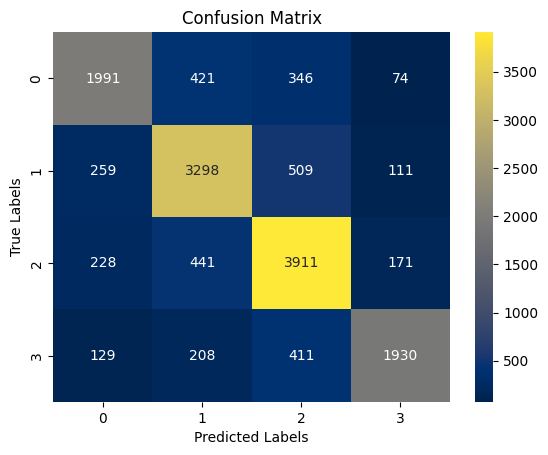

In [36]:
# show Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_np)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()